In [1]:
import data_functions as da
import ml_functions as ml

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
import sklearn.naive_bayes
import sklearn.neural_network
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import seaborn as sns

## Data Loading and Dataframe Creation

In [2]:
# to load
all_projects = da.read_data('projects.csv')
outcomes = da.read_data('outcomes.csv')

projects = da.specify_range(all_projects, 'date_posted', '2011-01-01', '2013-12-31')
combined = pd.merge(projects, outcomes, on='projectid')
funded = combined.loc[combined.fully_funded=='t']
unfunded = combined.loc[combined.fully_funded=='f']

In [3]:
combined.shape

(325266, 46)

In [4]:
combined.students_reached.describe()

count    325165.000000
mean         94.567616
std         157.738063
min           1.000000
25%          23.000000
50%          31.000000
75%         100.000000
max       12143.000000
Name: students_reached, dtype: float64

In [5]:
combined.total_price_excluding_optional_support.describe()

count    325266.000000
mean        537.309216
std         862.927189
min          37.030000
25%         290.560000
50%         430.320000
75%         615.827500
max      139725.410000
Name: total_price_excluding_optional_support, dtype: float64

In [7]:
inf = ['total_price_excluding_optional_support', 'total_price_including_optional_support', 'students_reached']
for i in inf:
    combined = da.remove_outliers(combined, i)

In [8]:
"all_projects", all_projects.shape, "outcomes", outcomes.shape

('all_projects', (370039, 35), 'outcomes', (619326, 12))

In [9]:
all_projects.columns

Index(['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_zip', 'school_metro', 'school_district', 'school_county',
       'school_charter', 'school_magnet', 'school_year_round', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise', 'teacher_prefix',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 'resource_type',
       'poverty_level', 'grade_level', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'date_posted'],
      dtype='object')

In [86]:
all_projects.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,resource_type,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,6.362701e+10,36.576340,-119.608713,Selma,CA,93662.0,NaN,...,Books,highest poverty,Grades 6-8,30.0,555.81,653.89,32.0,f,f,2014-05-12
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,d711e47810900c96f26a5d0be30c446d,4.837020e+11,32.911179,-96.723640,Dallas,TX,75243.0,urban,...,Books,highest poverty,Grades PreK-2,30.0,296.47,348.79,22.0,f,f,2014-05-12
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,665c3613013ba0a66e3a2a26b89f1b68,4.103270e+11,45.166039,-122.414576,Colton,OR,97017.0,rural,...,Technology,high poverty,Grades PreK-2,30.0,430.89,506.93,17.0,f,f,2014-05-11
3,bb18f409abda2f264d5acda8cab577a9,2133fc46f951f1e7d60645b0f9e48a6c,4f12c3fa0c1cce823c7ba1df57e90ccb,3.600153e+11,40.641727,-73.965655,Brooklyn,NY,11226.0,urban,...,Books,highest poverty,Grades 3-5,30.0,576.07,677.73,12.0,f,f,2014-05-11
4,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,6.227100e+10,34.043939,-118.288371,Los Angeles,CA,90006.0,urban,...,Other,highest poverty,Grades PreK-2,30.0,408.40,480.47,24.0,f,f,2014-05-11


In [87]:
outcomes.columns

Index(['projectid', 'is_exciting', 'at_least_1_teacher_referred_donor',
       'fully_funded', 'at_least_1_green_donation', 'great_chat',
       'three_or_more_non_teacher_referred_donors',
       'one_non_teacher_referred_donor_giving_100_plus',
       'donation_from_thoughtful_donor', 'great_messages_proportion',
       'teacher_referred_count', 'non_teacher_referred_count'],
      dtype='object')

Narrow down dataframes to only use project data from 2011 to 2013

In [88]:
projects.date_posted.min(), projects.date_posted.max()
projects.shape

(325266, 35)

Merge the projects and outcomes data frame together based on project ID

In [89]:
combined = pd.merge(projects, outcomes, on='projectid')
combined.columns

Index(['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_zip', 'school_metro', 'school_district', 'school_county',
       'school_charter', 'school_magnet', 'school_year_round', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise', 'teacher_prefix',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 'resource_type',
       'poverty_level', 'grade_level', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'date_posted', 'is_exciting', 'at_least_1_teacher_referred_donor',
       'fully_funded', 'at_least_1_green_donation', 'great_chat',
       'three_or_more_non_teacher_re

Create a dataframe of all the projects that were fully funded vs not funded. 

In [90]:
funded = combined.loc[combined.fully_funded=='t']
funded.shape

(229762, 46)

In [91]:
unfunded = combined.loc[combined.fully_funded=='f']
unfunded.shape

(95504, 46)

## Data Exploration & Pre-Processing

In [92]:
# to load
funded_by_state = da.find_top(funded, 'school_state')
funded_by_state.projectid.head()
limstate = funded_by_state['projectid'].head(10)

by_focus_area = da.find_top(projects, 'primary_focus_area')
limfocus = by_focus_area['projectid'].head(5)

da.find_top(combined, 'fully_funded')
ff_labels = ["Yes", "No"]
ff_vals = [247698, 105453]

In [93]:
projects.describe()

,school_ncesid,school_latitude,school_longitude,school_zip,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached
count,3.018980e+05,325266.000000,325266.000000,325266.000000,325266.000000,325266.000000,325266.000000,325165.000000
mean,2.496369e+11,36.903208,-95.706232,56866.907380,31.982009,537.309216,632.128512,94.567616
std,1.653664e+11,4.920718,18.203832,31074.688584,2.445752,862.927189,1015.208451,157.738063
min,1.000050e+10,18.249140,-171.690554,1001.000000,30.000000,37.030000,43.560000,1.000000
25%,6.351301e+10,33.923898,-117.698303,29483.000000,30.000000,290.560000,341.840000,23.000000
50%,2.314790e+11,36.755021,-90.036428,60632.000000,30.000000,430.320000,506.260000,31.000000
75%,3.904490e+11,40.681309,-80.767916,90012.000000,35.000000,615.827500,724.505000,100.000000
max,6.100008e+11,67.258157,-66.628036,99926.000000,35.000000,139725.410000,164382.840000,12143.000000


In [94]:
outcomes.describe()

,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
count,439487.00000,524928.000000,524928.000000
mean,52.92709,0.777339,4.361290
std,35.71410,2.227933,5.668748
min,0.00000,0.000000,0.000000
25%,25.00000,0.000000,1.000000
50%,50.00000,0.000000,3.000000
75%,83.00000,0.000000,5.000000
max,100.00000,151.000000,304.000000


In [18]:
da.na_cols(projects)

['school_ncesid',
 'school_metro',
 'school_district',
 'primary_focus_subject',
 'primary_focus_area',
 'secondary_focus_subject',
 'secondary_focus_area',
 'resource_type',
 'grade_level',
 'students_reached']

The majority of the columns which contain N/As are booleans, so it is not possible to impute values there. I decided to investigate students reached further. Although there is a wide variety in the number of students, the projects that teachers or schools request funding for could help or be for any number of students, so none of these numbers are necessarily outliers. 

In [19]:
projects.students_reached.describe()

count    325165.000000
mean         94.567616
std         157.738063
min           1.000000
25%          23.000000
50%          31.000000
75%         100.000000
max       12143.000000
Name: students_reached, dtype: float64

In [20]:
da.na_cols(outcomes)

['at_least_1_teacher_referred_donor',
 'at_least_1_green_donation',
 'three_or_more_non_teacher_referred_donors',
 'one_non_teacher_referred_donor_giving_100_plus',
 'donation_from_thoughtful_donor',
 'great_messages_proportion',
 'teacher_referred_count',
 'non_teacher_referred_count']

For both the projects and outcomes dataframes the columns that contain N/A values are not necessarily required for every project.
Further, they generally are not suited for statistical analysis or imputation. 

In [21]:
by_state = da.find_top(projects, 'school_state')

In [22]:
funded_by_state = da.find_top(funded, 'school_state')
funded_by_state.projectid.head()
limstate = funded_by_state['projectid'].head(10)
limstate

school_state
CA    53000
NY    19090
TX    14509
FL    11743
IL    10822
NC     9531
GA     6004
TN     5612
WA     5436
PA     4980
Name: projectid, dtype: int64

#### The states where the most number of projects are requested are California, New York, Texas, Florida, and North Carolina. This is not surprising as these are some of the larger states, and the ones who often have problems with public school funding, especially in urban areas. However, the most projects are funded in the first four states, and then in Illinois. 

In [23]:
by_focus_area = da.find_top(projects, 'primary_focus_area')
limfocus = by_focus_area['projectid'].head(5)
limfocus

primary_focus_area
Literacy & Language    148732
Math & Science          81255
Music & The Arts        29268
Applied Learning        22303
Special Needs           21462
Name: projectid, dtype: int64

#### The primary subject areas where projects mostly concentrated with Literacy & Language, Math & Science, Music & The Arts, Applied Learning,and Special Needs.

In [24]:
print("Funds Requested")
print("Mean", projects.total_price_excluding_optional_support.mean())
print("Maximum", projects.total_price_excluding_optional_support.max())
print("Minimum", projects.total_price_excluding_optional_support.min())

Funds Requested
Mean 537.309215657
Maximum 139725.41
Minimum 37.03


In [25]:
print("Funds Provided")
print("Mean", funded.total_price_excluding_optional_support.mean())
print("Maximum", funded.total_price_excluding_optional_support.max())
print("Minimum", funded.total_price_excluding_optional_support.min())

Funds Provided
Mean 488.181038292
Maximum 139725.41
Minimum 37.03


In [26]:
print("Funds Not Provided")
print("Mean", unfunded.total_price_excluding_optional_support.mean())
print("Maximum", unfunded.total_price_excluding_optional_support.max())
print("Minimum", unfunded.total_price_excluding_optional_support.min())

Funds Not Provided
Mean 655.501001215
Maximum 63530.69
Minimum 45.15


#### While the average amount requested for a project was 531 dollars, the average amount requested for the projects that were fully funded was 482 dollars. 

In [27]:
da.find_top(funded, 'is_exciting')
#funded_exciting = round((31611 / (31611 + 216087))*100)

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
is_exciting,,,,,,,,,,,,,,,,,,,,,
f,200788,200788,200788,186749,200788,200788,200788,200788,200788,177881,...,200762,200788,200762,200788,200762,200762,200762,196509,200762,200762
t,28974,28974,28974,26343,28974,28974,28974,28974,28974,25476,...,28974,28974,28974,28974,28974,28974,28974,28974,28974,28974


In [28]:
da.find_top(funded, 'is_exciting')
funded_exciting = round((31611 / (31611 + 216087))*100)
funded_exciting

13

In [29]:
list(unfunded.is_exciting.unique())

['f']


#### Even among the funded projects, only 13% were deemed "exciting". However, none of the not funded projects were deemed exciting. 

In [30]:
da.find_top(combined, 'fully_funded')
ff_labels = ["Yes", "No"]
ff_vals = [247698, 105453]


## Data Representation 

### Do most projects get funded?

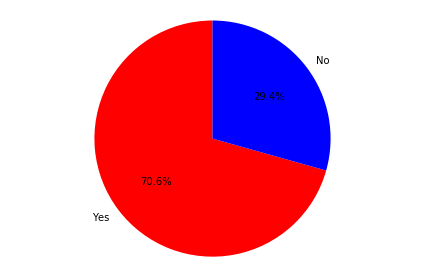

In [31]:
da.pie_top(combined, 'fully_funded',  labels = ("Yes", "No"))

### Which subjects are the funded projects for?

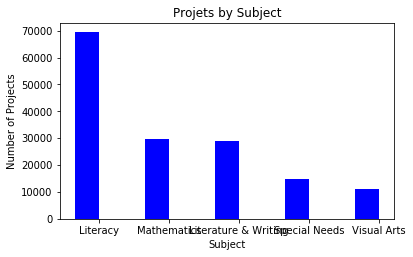

In [32]:
da.bar_top(funded, 'primary_focus_subject', "Subject", "Number of Projects", "Projets by Subject")

### Do some grades get more funding than others?

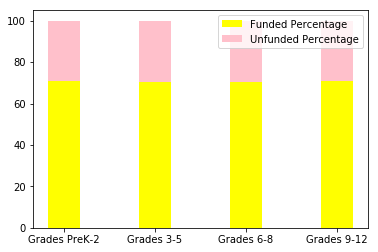

In [127]:
plot_percentage_bar_chart(funded, unfunded, "grade_level", ('Funded Percentage', 'Unfunded Percentage'), colors = ("yellow", "pink"))

### Which states are the most funded projects located in?

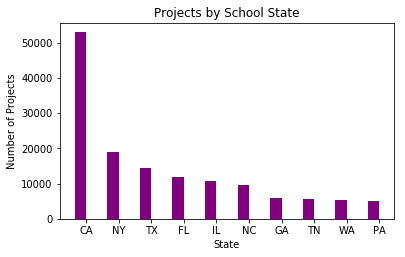

In [44]:
da.plot_bar_chart(tuple(limstate.index), tuple(limstate), "State", "Number of Projects", "Projects by School State")

### Which socioeconomic groups would most of the projects help . . . . 

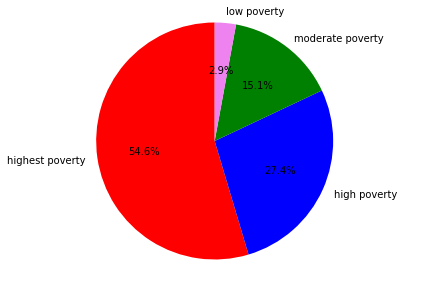

In [42]:
da.pie_top(projects, "poverty_level")

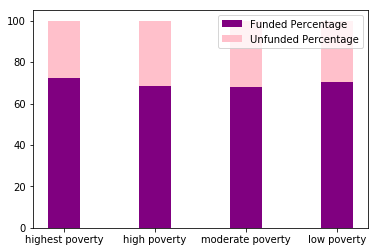

In [14]:
plot_percentage_bar_chart(funded, unfunded, "poverty_level", ('Funded Percentage', 'Unfunded Percentage'))

It's not surprising to see that most of the projects requested and funded are for high poverty schools in the largest states, such as California, Texas, and New York. It also makes sense that more projects for students in PreK-5th grade are both requested and funded, as those grades projects are likely to require more extracurricular materials and be easy to explain to potential donors. 

In [15]:
def plot_percentage_bar_chart(df1, df2, col_of_interest, legend, selected_col = 'projectid', colors = ["purple", "pink"]):
    
    
    df1, df2 = da.find_top(df1, col_of_interest), da.find_top(df2, col_of_interest)
    df1, df2 = df1[selected_col], df2[selected_col]
    df1_percent, df2_percent = get_percent(df1, df2)
    
    N = len(df1_percent)
    b1 = df1_percent
    b2 = df2_percent

    ind = np.arange(N)    # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

    p1 = plt.bar(ind, b1, width, color=colors[0])
    p2 = plt.bar(ind, b2, width,color=colors[1], bottom=b1)

    plt.xticks(ind, (tuple(df1.index)))

    plt.legend((p1[0], p2[0]), legend)

    plt.show()


In [17]:
def get_percent(s1, s2):
    # helper function for plot_percentage_double_bar_chart
    s1_percent, s2_percent = [], []
    for i in range(len(s1)):
        temp_total = s1[i] + s2[i]
        s1_percent.append((s1[i]/temp_total)*100)
        s2_percent.append((s2[i]/temp_total)*100)
    return tuple(s1_percent), tuple(s2_percent)

### Who doesn't get funded?

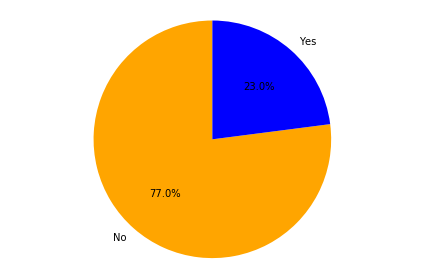

In [112]:
da.pie_top(unfunded, 'at_least_1_teacher_referred_donor', labels=("No", "Yes"), colors = ["orange", "blue"])

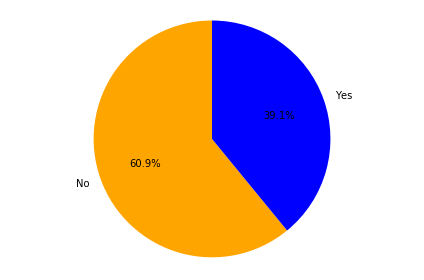

In [113]:
da.pie_top(funded, 'at_least_1_teacher_referred_donor', labels=("No", "Yes"), colors = ["orange", "blue"])

23% of unfunded projects had a teacher referred donor while 39% of the funded projects had at least one. Referral from a teacher seems to be a contributor to making sure a project is funded. This is likely a signal for quality and increases the visibility of the project. It may also be a proxy for other factors as these projects may have more support in the school of a more qualified teacher supporting it. 

school_charter


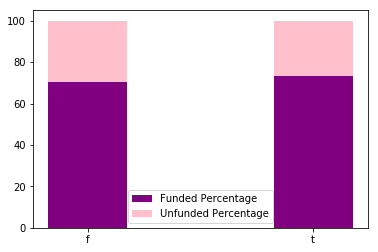

school_magnet


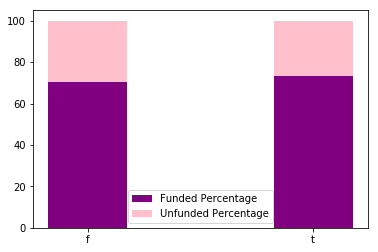

school_year_round


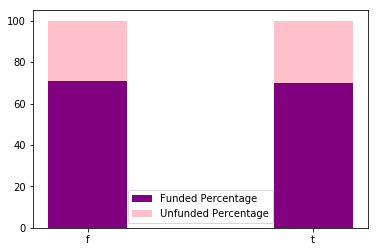

school_nlns


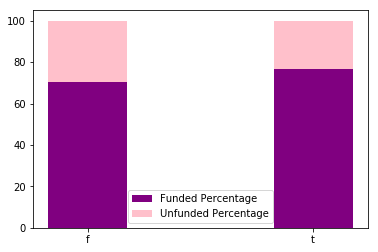

school_kipp


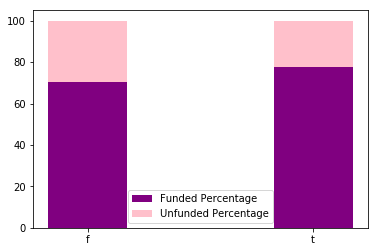

school_charter_ready_promise


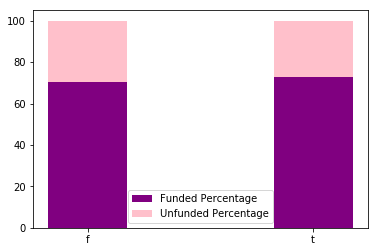

teacher_teach_for_america


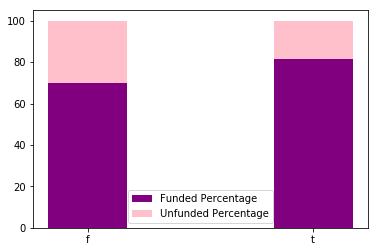

teacher_ny_teaching_fellow


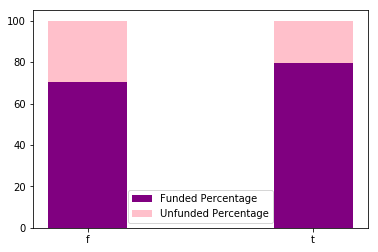

primary_focus_subject


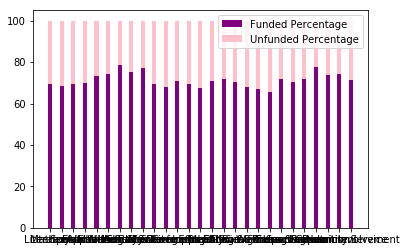

primary_focus_area


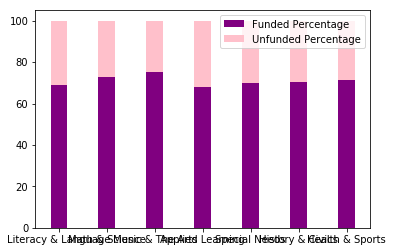

secondary_focus_subject


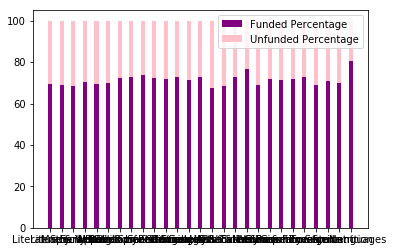

secondary_focus_area


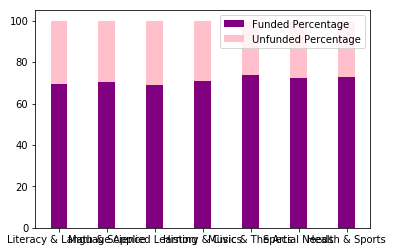

resource_type


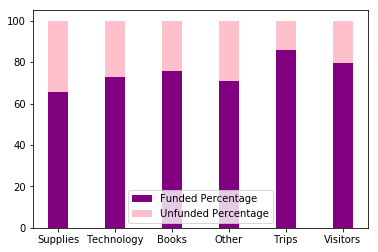

poverty_level


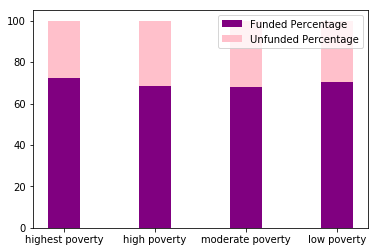

grade_level


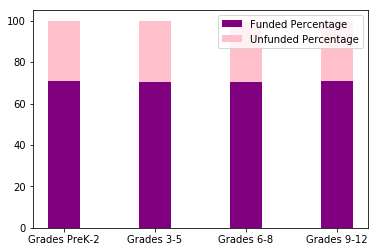

eligible_double_your_impact_match


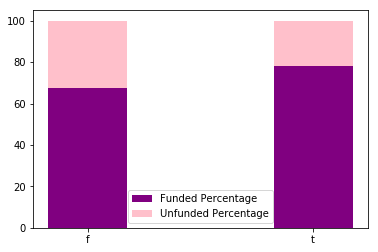

eligible_almost_home_match


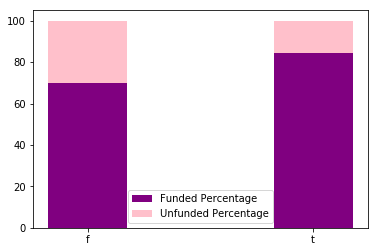

at_least_1_teacher_referred_donor


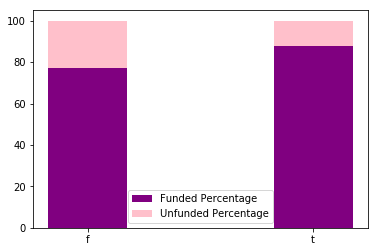

fully_funded


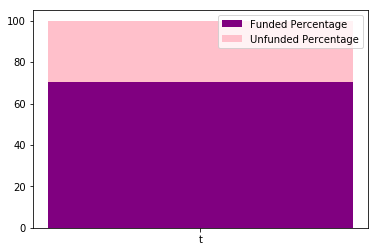

at_least_1_green_donation


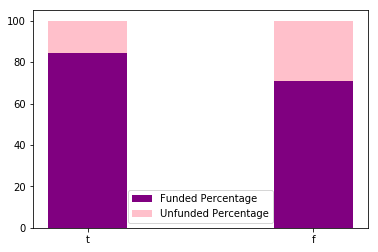

great_chat


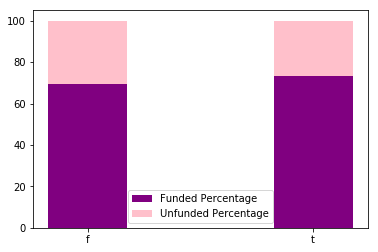

three_or_more_non_teacher_referred_donors


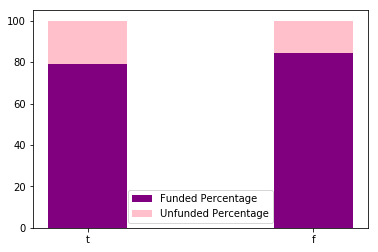

one_non_teacher_referred_donor_giving_100_plus


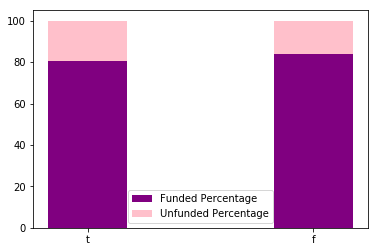

donation_from_thoughtful_donor


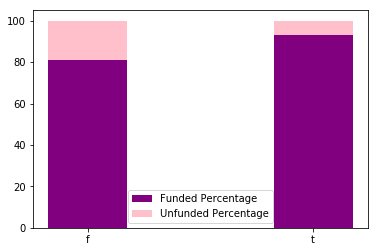

In [125]:
all_cols = ['school_charter', 'school_magnet', 'school_year_round', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise', 
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 'resource_type',
       'poverty_level', 'grade_level', 
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
         'at_least_1_teacher_referred_donor',
       'fully_funded', 'at_least_1_green_donation', 'great_chat',
       'three_or_more_non_teacher_referred_donors',
       'one_non_teacher_referred_donor_giving_100_plus',
       'donation_from_thoughtful_donor']
# resource_type, eligible_double_your_impact_match, eligible_double_your_home_match, at_least_1_green_donation, donation from thoughtful donor
for i in all_cols:
    print(i)
    if i != 'projectid':
        plot_percentage_bar_chart(funded, unfunded, i, ('Funded Percentage', 'Unfunded Percentage'))

In the previous line bar graphs were constructed for each of the possible factors. The majority of the factors were the same regardless of whether the projects funded or not. However, some did stand out: resource_type, eligible_double_your_impact_match, eligible_double_your_home_match, at_least_1_green_donation, donation from thoughtful donor. These could be indicators of potential features. 

The correlation heatmaps were not included as they were not informative and the insight provided was redundant. 